# Import data and libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path

path = r'G:\My Drive\CareerFoundry\Python Projects\2023-10 Instacart Basket Analysis'

In [85]:
# Import data

ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
ords_prods_cust_merged.shape

(32404859, 25)

In [5]:
ords_prods_cust_merged.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_period_of_day,loyalty_flag,spending_flag,order_freq_flag,gender,state,age,dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423


# Create a histogram of the “order_hour_of_day” column

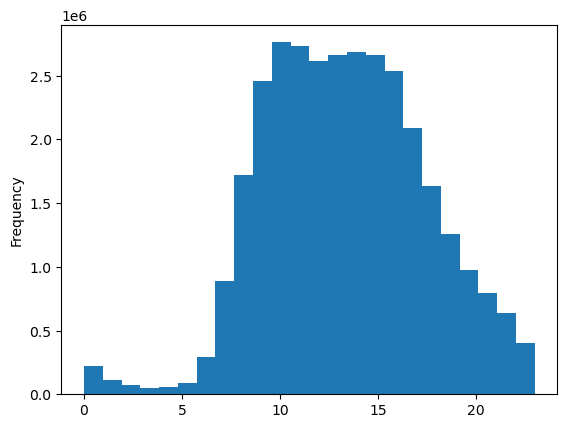

In [6]:
# Create histogram for order_hour_of_day with 24 bins

hist_hod = ords_prods_cust_merged['order_hour_of_day'].plot.hist(bins = 24)

In [7]:
# Export chart

hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

### Analysis shows that most users place orders between 9am and 4pm, while the least amount of orders take place between 12am and 6am.

# Create a bar chart from the “loyalty_flag” column

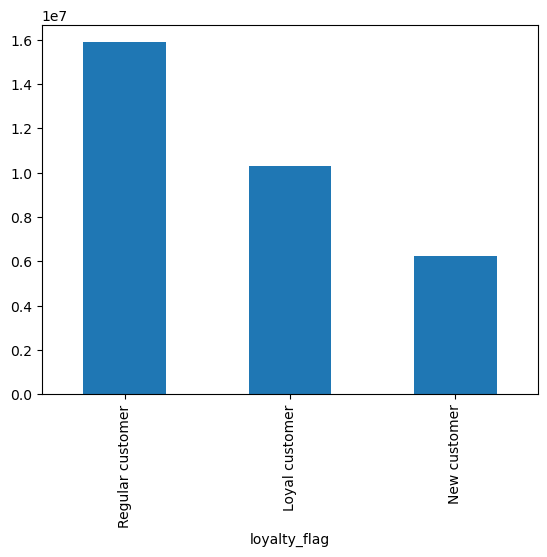

In [8]:
# Create a bar chart from the loyalty_flag

bar_loyalty = ords_prods_cust_merged['loyalty_flag'].value_counts().plot.bar()

### This bar chart shows that Regular customers - those that have placed 11-40 orders - far outnumber Loyal customers (over 40 orders) and New customers (<=10 orders).

In [9]:
# Export chart

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty_flag.png'))

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [10]:
# First create an accurate sample

In [187]:
# First attempt showed a disparity between small and big line charts - to correct, I am changing all prices over 100 to Nan

# Change outliers to NaN to correct skew of distribution

ords_prods_cust_merged.loc[ords_prods_cust_merged['prices'] >100, 'prices'] = np.nan

In [188]:
ords_prods_cust_merged['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [189]:
# Create random list

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merged)) <= 0.7

In [190]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [191]:
# Store 30% of the sample in the small and 70% in big

big = ords_prods_cust_merged[dev]
small = ords_prods_cust_merged[~dev]

In [192]:
# Check results by adding big and small df to see if their combined length = the entire df length

len(ords_prods_cust_merged)

32404859

In [193]:
len(big) + len(small)

32404859

In [194]:
# Remove unnecessary columns 

small_2 = small[['order_hour_of_day', 'prices']]

In [195]:
small_2.shape

(9721098, 2)

Text(0, 0.5, 'Total Revenue')

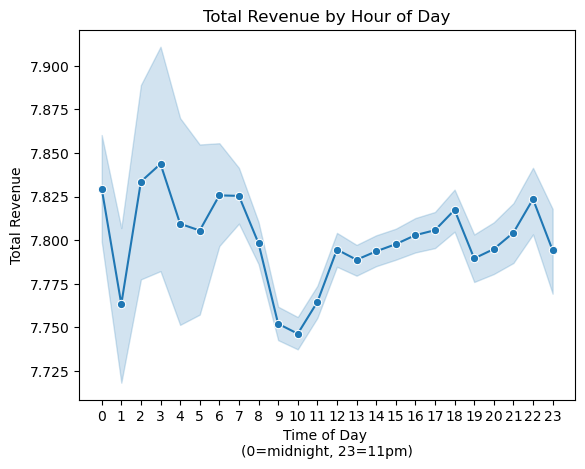

In [216]:
# Create the line chart of the small_2 subset

line_prices_hod = sns.lineplot(data = small_2, x = 'order_hour_of_day', y = 'prices', marker='o')

plt.title('Total Revenue by Hour of Day')
plt.xlabel('Time of Day \n(0=midnight, 23=11pm)')
plt.xticks(np.arange(0, 24))
plt.ylabel('Total Revenue')

In [21]:
# Check against big 

big_2 = big[['order_hour_of_day', 'prices']]

In [22]:
big_2.shape

(22683761, 2)

<Axes: xlabel='order_hour_of_day', ylabel='prices'>

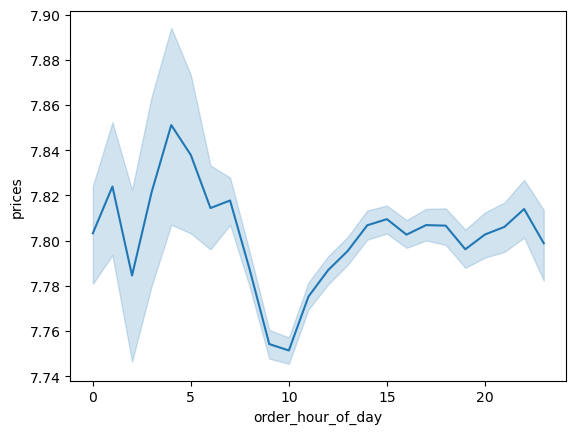

In [23]:
sns.lineplot(data = big_2, x = 'order_hour_of_day', y = 'prices')

### The line charts aren't identical but seem to within the error bands.

In [228]:
# Export chart

line_prices_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'))

# Determine whether there’s a connection between age and family situation

In [25]:
# remove unnecessary columns

small_3 = small[['dependants', 'age']]

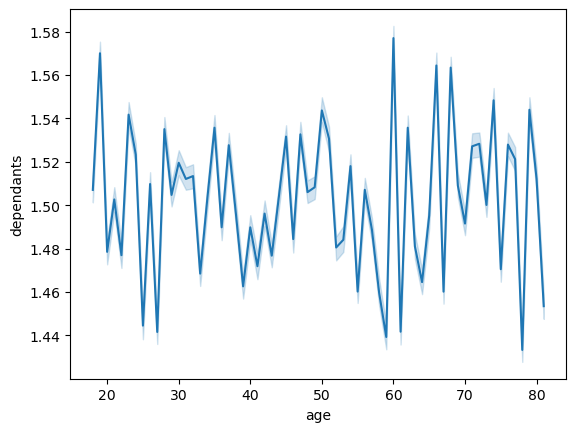

In [26]:
# Create line chart of age and dependants

line_age_dep = sns.lineplot(data = small_3, x = 'age', y = 'dependants')

In [27]:
# Compare to line chart of big

big_3 = big[['age', 'dependants']]

<Axes: xlabel='age', ylabel='dependants'>

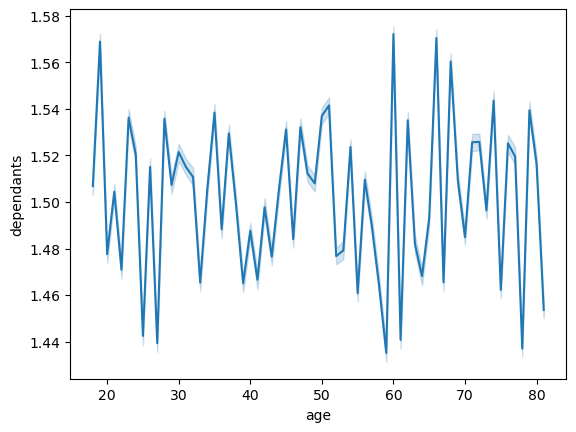

In [28]:
sns.lineplot(data = big_3, x = 'age', y = 'dependants')

In [29]:
# Line charts match

### The line charts doesn't show any correlation between age and number of dependants.

In [30]:
# Export chart

line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

# Explore whether there’s a connection between age and spending power (income)

In [31]:
# create small subset with necessary columns only

small_4 = small[['age', 'income']]

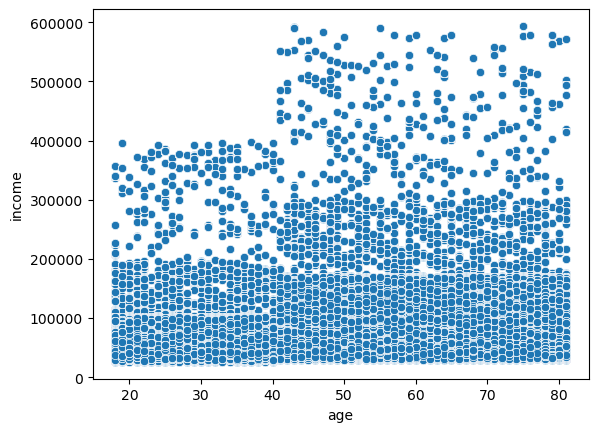

In [32]:
# Create a scatterplot between age and income

scat_age_income = sns.scatterplot(x = 'age', y = 'income',data = small_4)

### The scatterplot shows that 40+ year-olds are the only demographic to break the 400k dollar income ceiling and also have a denser grouping of 200k to 300k incomes compared to the 18-40 year olds. Clearly, the 40+ demographic has more spending power.

### That said, groceries aren't a luxury, they're a necessity and are priced to be accessible to a much wider income bracket. Further analysis is needed to determine if income has any correlation with loyalty, spending, and order_frequency.

In [33]:
# Export chart

scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))